In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
from os import listdir
import re

In [2]:
# get all file names
files = [f for f in listdir('generator/') if f[-4:]=='.png']
# load one to get the dimensions
image = mpimg.imread(f'generator/{files[0]}')
# get dimensions
shape = list(image.shape)
# remove alpha if necessary
if (shape[2]==4):
    shape[2] = 3
n = len(files)

In [3]:
y = np.zeros(shape=n,dtype=int)
X = np.zeros(shape=(n,*shape))
for i in range(len(files)):
    # get the hour from the file name
    y[i] = re.search('^([0-9]*)_',files[i])[1]
    # get the pixels, remove the alpha if needed and convert to 0-255
    X[i] = (mpimg.imread(f'generator/{files[i]}')[:,:,:shape[2]] )

In [4]:
# transform y to label encoded
temp = y.copy()
y = np.zeros(shape=(n,12),dtype=int)
for i in range(n):
    y[i,temp[i]-1] = 1

In [22]:
X_train = X[:3000]
y_train = y[:3000]

X_test = X[3000:4000]
y_test = y[3000:4000]

4443
[0 0 0 0 0 0 0 0 0 1 0 0]


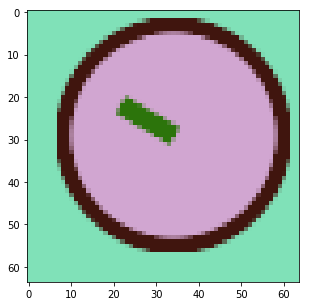

In [7]:
i = np.random.randint(0,n)
print(i)
print(y[i])
plt.figure(figsize=(5,5))
plt.imshow(X[i])
plt.show()

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Convolution2D, Flatten, MaxPooling2D, Activation, Dropout
from keras.optimizers import SGD

Using TensorFlow backend.


In [23]:
model = Sequential()
model.add(Convolution2D(64, kernel_size=3,activation='relu', input_shape=shape))
model.add(Convolution2D(32, kernel_size=3,activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(12,activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [24]:
model.fit(X_train, y_train,
          epochs=10,
          batch_size=50)

Epoch 1/10
3000/3000 [==============================] - 55s 18ms/step - loss: 2.5706 - acc: 0.0823
Epoch 2/10
3000/3000 [==============================] - 53s 18ms/step - loss: 2.4801 - acc: 0.1133
Epoch 3/10
3000/3000 [==============================] - 53s 18ms/step - loss: 2.3087 - acc: 0.2147
Epoch 4/10
3000/3000 [==============================] - 53s 18ms/step - loss: 1.6909 - acc: 0.3980
Epoch 5/10
3000/3000 [==============================] - 56s 19ms/step - loss: 1.2968 - acc: 0.5237
Epoch 6/10
3000/3000 [==============================] - 56s 19ms/step - loss: 1.0296 - acc: 0.6257
Epoch 7/10
3000/3000 [==============================] - 58s 19ms/step - loss: 0.8235 - acc: 0.6990
Epoch 8/10
3000/3000 [==============================] - 55s 18ms/step - loss: 0.6883 - acc: 0.7447
Epoch 9/10
3000/3000 [==============================] - 54s 18ms/step - loss: 0.5911 - acc: 0.7830
Epoch 10/10
3000/3000 [==============================] - 52s 17ms/step - loss: 0.4850 - acc: 0.8210


In [25]:
score = model.evaluate(X_test, y_test, batch_size=50)
score

1000/1000 [==============================] - 5s 5ms/step


[0.6034862771630287, 0.7909999966621399]

In [26]:
model.save('hours_64x64_color_260219.h5')

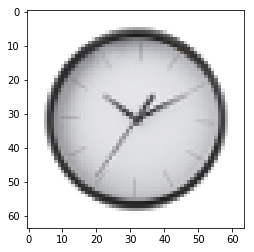

In [53]:
# randomly picked a googled image: https://www.google.com/url?sa=i&source=images&cd=&cad=rja&uact=8&ved=2ahUKEwi1oKqrj9rgAhUXFjQIHbdLBM4QjRx6BAgBEAU&url=https%3A%2F%2Fwww.kmart.com.au%2Fproduct%2Fblack-table-clock-alarm%2F1283324&psig=AOvVaw10LnEqS6HQAIXT-3J6kEDQ&ust=1551295125606041
image = mpimg.imread('real_test.png') # resized in gimp to 64x64
image = image.reshape(1,64,64,3)
plt.imshow(image[0])
plt.show()

In [54]:
np.round(model.predict_proba(image),3)

array([[0.028, 0.928, 0.041, 0.   , 0.   , 0.   , 0.   , 0.002, 0.   ,
        0.   , 0.   , 0.   ]], dtype=float32)